In [155]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import itertools
from matplotlib.pyplot import figure

In [156]:
Q1  = '''Recipient First Name Recipient Last Name	Sarah Stratman	Kelly Arbuckle	Tamara Gass	Vincent Gregorio	Sarah Kroenke	Alexandra Bastian	Hilary Caldwell	Alex Muessigmann	Bethany Neuhart	Ted Stocking	Stephanie Barker	Jake Kment	Alex Kreft	Rachel Mulder	Natalie Palmgren	Mary Quandt
Sarah Stratman	4	2	3	2	2	2	2	2	2	4	2	2	2	4	2	4
Kelly Arbuckle	3	4	3	3	3	3	3	3	3	3	3	3	3	3	3	3
Tamara Gass	2	2	4	2	3	2	3	2	4	2	2	4	4	2	2	2
Vincent Gregorio	3	3	3	4	3	3	3	4	3	4	3	3	3	3	3	3
Sarah Kroenke	2	3	3	4	4	4	2	4	2	2	4	2	2	2	4	2
Alexandra Bastian	2	2	2	3	4	4	2	2	2	2	4	2	2	2	4	2
Hilary Caldwell	1	3	4	2	1	2	4	2	4	2	3	4	4	1	3	2
Alex Muessigmann	3	4	2	4	2	3	2		2	2	4	3	3	1	3	1
Bethany Neuhart	1	1	4	1	1	1	4	1	4	1	2	4	4	1	1	1
Ted Stocking	4	2	2	4	2	2	2	2	2	4	2	2	2	3	2	3
Stephanie Barker	2	3	2	4	4	4	2	4	2	2	4	2	2	2	4	3
Jake Kment	3	2	4	3	2	2	4	3	2	3	2	4	4	2	2	2
Alex Kreft	3	3	4	3	3	3	4	3	4	3	3	4	4	3	3	3
Rachel Mulder	4	2	2	3	2	3	2	2	2	4	2	2	2	4	2	4
Natalie Palmgren	3	3	3	3	4	4	3	3	3	3	4	3	3	3	4	3
Mary Quandt	4	3	2	3	3	3	2	3	3	3	3	3	3	4	3	4'''

In [157]:
data = [y for y in [x.strip() for x in Q1.splitlines()] if y]

In [158]:
set= []
for x in data:
    x = x.strip()
    x = x.split("\t")
    set.append(x)
data = set

In [168]:
nodes = data[0]
nodes = nodes[1::]
for i in range(len(nodes)):    
    print(str(i)+" "+ str(nodes[i]))
    nodes[i] = "Node"+str(i)
print(nodes)

0 Sarah Stratman
1 Kelly Arbuckle
2 Tamara Gass
3 Vincent Gregorio
4 Sarah Kroenke
5 Alexandra Bastian
6 Hilary Caldwell
7 Alex Muessigmann
8 Bethany Neuhart
9 Ted Stocking
10 Stephanie Barker
11 Jake Kment
12 Alex Kreft
13 Rachel Mulder
14 Natalie Palmgren
15 Mary Quandt
['Node0', 'Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8', 'Node9', 'Node10', 'Node11', 'Node12', 'Node13', 'Node14', 'Node15']


In [169]:
mat = []
for x in data[1::]:
    mat.append(x[1::])
n = len(mat)

for x in range(len(mat)):
    for y in range(len(mat[x])):
        if (mat[x][y]==''):
            continue
        if (int(mat[x][y])!=1 or x==y ):
            mat[x][y] = ''
        else:
            mat[x][y] = int(mat[x][y])

# for i in range(0, n):
#     for j in range(i+1, n):
#         mat[i][j],mat[j][i] = mat[j][i],mat[i][j]

for i in range(len(mat)):
    print(mat[i])


['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
[1, '', '', '', 1, '', '', '', '', '', '', '', '', 1, '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', 1, '', 1]
[1, 1, '', 1, 1, 1, '', 1, '', 1, '', '', '', 1, 1, 1]
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '',

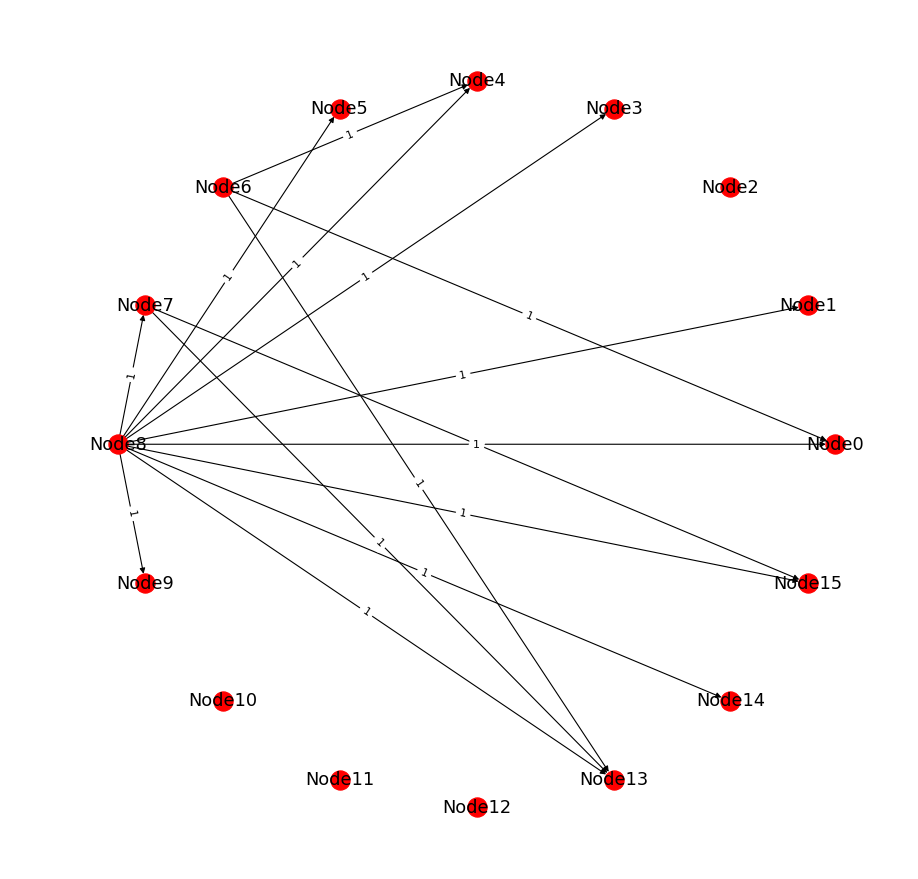

In [170]:
A = np.matrix(mat)

G=nx.from_numpy_matrix(A, create_using=nx.DiGraph())

pos=nx.circular_layout(G) # positions for all nodes
figure(num=None, figsize=(14, 14), dpi=80)


x = 0
d = { i : nodes[i] for i in range(len(nodes)) }

nx.draw_networkx_labels(G,pos,d,font_size=16)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

nx.draw(G, pos)  # networkx draw()

# plt.show()

In [171]:
# Centrality
# Compute the degree centrality for nodes.
print(nx.degree_centrality(G))

{0: 0.13333333333333333, 1: 0.06666666666666667, 2: 0.0, 3: 0.06666666666666667, 4: 0.13333333333333333, 5: 0.06666666666666667, 6: 0.2, 7: 0.2, 8: 0.6666666666666666, 9: 0.06666666666666667, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.2, 14: 0.06666666666666667, 15: 0.13333333333333333}


In [172]:
# Centrality
# Compute the in-degree centrality for nodes.
print(nx.in_degree_centrality(G))

{0: 0.13333333333333333, 1: 0.06666666666666667, 2: 0.0, 3: 0.06666666666666667, 4: 0.13333333333333333, 5: 0.06666666666666667, 6: 0.0, 7: 0.06666666666666667, 8: 0.0, 9: 0.06666666666666667, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.2, 14: 0.06666666666666667, 15: 0.13333333333333333}


In [173]:
for x in range(len(nodes)):
    print(str(x)+ " " +nodes[x])

0 Node0
1 Node1
2 Node2
3 Node3
4 Node4
5 Node5
6 Node6
7 Node7
8 Node8
9 Node9
10 Node10
11 Node11
12 Node12
13 Node13
14 Node14
15 Node15


In [174]:
# Centrality
# Compute the out-degree centrality for nodes.
print(nx.out_degree_centrality(G))

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.2, 7: 0.13333333333333333, 8: 0.6666666666666666, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0}


In [175]:
print(nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None))

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0}


In [176]:
print(nx.edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None))


{(6, 0): 0.004166666666666667, (6, 4): 0.004166666666666667, (6, 13): 0.004166666666666667, (7, 13): 0.004166666666666667, (7, 15): 0.004166666666666667, (8, 0): 0.004166666666666667, (8, 1): 0.004166666666666667, (8, 3): 0.004166666666666667, (8, 4): 0.004166666666666667, (8, 5): 0.004166666666666667, (8, 7): 0.004166666666666667, (8, 9): 0.004166666666666667, (8, 13): 0.004166666666666667, (8, 14): 0.004166666666666667, (8, 15): 0.004166666666666667}


In [177]:
len(G.edges(data=True))

15

In [178]:
ResponseId	RecipientLastName	RecipientFirstName	Q3_1	Q3_2	Q3_4	Q3_6	Q3_7	Q3_8	Q3_9	Q3_10	Q3_11	Q3_12	Q3_13	Q3_14	Q3_15	Q3_16	Q3_17	Q3_18
Response ID	Recipient Last Name	Recipient First Name	Bayard High School	Beadle Middle School	Burke High School	Elkhorn Grandview Middle School	Hastings Middle School	Irving Middle School	King Science and Technology Magnet Middle School	McMillan Magnet Middle School	Monroe Middle School	Morton Middle School	Omaha North High School	Papillion Middle School	Raymond Central Junior and Senior High School	RM Marrs Magnet Middle School	St. Pius X/St. Leo School	Valentine Middle School
R_12zi5YvsbKbK0PS	Stratman	Sarah	5	1	1	5	5	5	5	5	5	5	1	5	5	1		5
R_xfmqF47UasOQQgN	Arbuckle	Kelly	5	5	5	5	5	5	5	1	5	5	5	5	5	5	5	5
R_3Rt2KtMrSebHt8C	Gass	Tamara	5			5	5											
R_3jZL1Tb3LcaxQC8	Gregorio	Vincent	1	1,2,3	1	1	1	1	1,2,3	1,4	5	1,2,3	1	1	1	1	1	1
R_AGoRD2FAEAz5oqJ	Kroenke	Sarah	1	5	5	5	5	5	5	5	5	1	5	5	1	1	1	1
R_PIjMl19wNRgO1KF	Bastian	Alexandra	5	5	5	5	5	5	5	5	5	5	5	5	5	5	5	5
R_2EHaxAn1cyWlUs8	Caldwell	Hilary																
R_2rBDJnGHHO0Ms68	Muessigmann	Alex	1	4	4	4	4	4	1,2	1,2	1,2	4	4	4	4	4	4	4
R_12Je8PztYW7O6WE	Neuhart	Bethany	5	5	5	5	1	5	5	5	5	5	5	5	5	5	5	5
R_SJcs8CZ8gRAfa4p	Stocking	Ted	5	1,2,3,4	5	5	5	5	5	5	5	5	5	5	5	5	5	5
R_1ONTmKZ2bA4sqcW			5	5	5	5	5	5	2	2	2	2	4	5	5	2	5	5
R_sFJ7d8KxyJVaqhX	Barker	Stephanie	1	5	5	5	5	5	5	5	5	5	5	5	5	5	5	4
R_3HpEsHfFzA8khlw	Kment	Jake	5	5	5	1,2,3	4	5	5	5	5	5	5	4	5	5	5	4
R_b8aWxrNRwKGgqS5	Kreft	Alex	5	5	5	5	5	5	5	5	5	5	5		5	5	5	5
R_1CmBPWGleJHzPOB			5	5	5	5	5	5	5	5	5	5	5	5	5	5	5	5
R_1OittT3xysCWRhN	Palmgren	Natalie	5	5	5	5	5	5	5	5	5	5	5	5	5		5	5
R_72tUpdwfeTFQ6Ot	Mulder	Rachel	5	5	1	5	5	5	4	3	4	4	1,2	5	3	5	3	5
R_RwtVNwIUp926P6h	Palmgren	Natalie	5	5	5	5	5	5	4	4	5	5	4	5	5	1	5	5
R_2xLzLCa7Ws8kcDN	Quandt	Mary	1	1	1,3	1	5	5	1	1	5	1	1	1	1	1	1	1

SyntaxError: invalid syntax (<ipython-input-178-9439d9fe0803>, line 1)

In [179]:
# Question 2 in order
	3	3	2	1	3	3	3	3	1	3	3	3	1	3	3
3	1	3	3	3	3	3	1,2	3	3	3	3	3	3	3	3
	3				3	1,2		1,2		3	1,2	1,2			
1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2
1	1	1	1	1,2	1,2	3	1	3	3	1,2	3	3	3	1,2	1
1	1	1	1	2	1	1	1	1	1	1	1	1	1	2	1
3	3	1,2	3	3	3	1,2	3	1,2	3	2	1,2	1,2	3	2	3
3	1,2	3	1,2	3	1,2	3		3	3	1,2	1,2	1,2	3	1,2	3
3	3	1	3	3	3	1	3	1	3	3	1	1	3	3	3
1,2	3	3	1,2	3	3	3	3	3	1,2	3	3	3	1,2	3	1,2
3	1	3	1,2	1,2	1,2	1	1,2	3	3		3	3	3	1,2	1,2
3	3	1,2	1	3	3	1,2	3	1,2	3	3	3	1,2	3	3	3
2	3	1	2	3	3	1	2	1	2	3	1		2	3	3
2	3	3	2	2,3	2	3	3	3	2	3	3	3	1	3	1
3	3	3	1,2	1,2	1,2	3	3	3	3	1,2	3	3	3	1,2	3
1,2	1,2	3	1,2	1,2	1,2	3	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2	1,2


IndentationError: unexpected indent (<ipython-input-179-abdd9c1ea1a3>, line 2)

In [180]:
Q2 = '''Sarah Stratman	Kelly Arbuckle	Tamara Gass	Vincent Gregorio	Sarah Kroenke	Alexandra Bastian	Hilary Caldwell	Alex Muessigmann	Bethany Neuhart	Ted Stocking	Stephanie Barker	Jake Kment	Alex Kreft	Rachel Mulder	Natalie Palmgren	Mary Quandt
	3	3		1	3	3	3	3	1	3	3	3	1	3	3
3	1	3	3	3	3	3	1	3	3	3	3	3	3	3	3
	3				3	1		1		3	1	1			
1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1
1	1	1	1	1	1	3	1	3	3	1	3	3	3	1	1
1	1	1	1		1	1	1	1	1	1	1	1	1		1
3	3	1	3	3	3	1	3	1	3		1	1	3		3
3	1	3	1	3	1	3		3	3	1	1	1	3	1	3
3	3	1	3	3	3	1	3	1	3	3	1	1	3	3	3
1	3	3	1	3	3	3	3	3	1	3	3	3	1	3	1
3	1	3	1	1	1	1	1	3	3		3	3	3	1	1
3	3	1	1	3	3	1	3	1	3	3	3	1	3	3	3
	3	1		3	3	1		1		3	1			3	3'''

In [181]:
data2 = [y for y in [x for x in Q2.splitlines()] if y]
# for x in data:
#     print(x)
set2= []
for x in data2:
    x = x.split("\t")
    set2.append(x)
data2 = set2
nodes = data2[0]
for i in range(len(nodes)):    
    print(str(i)+" "+ str(nodes[i]))
    nodes[i] = "Node"+str(i)
print(nodes)
nodesR = nodes.copy()
nodesL = nodes.copy()


0 Sarah Stratman
1 Kelly Arbuckle
2 Tamara Gass
3 Vincent Gregorio
4 Sarah Kroenke
5 Alexandra Bastian
6 Hilary Caldwell
7 Alex Muessigmann
8 Bethany Neuhart
9 Ted Stocking
10 Stephanie Barker
11 Jake Kment
12 Alex Kreft
13 Rachel Mulder
14 Natalie Palmgren
15 Mary Quandt
['Node0', 'Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8', 'Node9', 'Node10', 'Node11', 'Node12', 'Node13', 'Node14', 'Node15']


In [182]:
from networkx.algorithms import bipartite
B = nx.Graph()
for i in range(len(nodes)):
    nodesL[i] = nodes[i]+"L"
for i in range(len(nodes)):
    nodesR[i] = nodes[i]+"R"
B.add_nodes_from(nodesL, bipartite=0)
B.add_nodes_from(nodesR, bipartite=1)



In [183]:
print(nodes)
for x in range(len(data2)):
    for y in range(len(data2[x])):
        if x==y+1:
            continue
        if data2[x][y] == '1':
            B.add_edges_from([(nodesL[x-1], nodesR[y])])

['Node0', 'Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8', 'Node9', 'Node10', 'Node11', 'Node12', 'Node13', 'Node14', 'Node15']


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


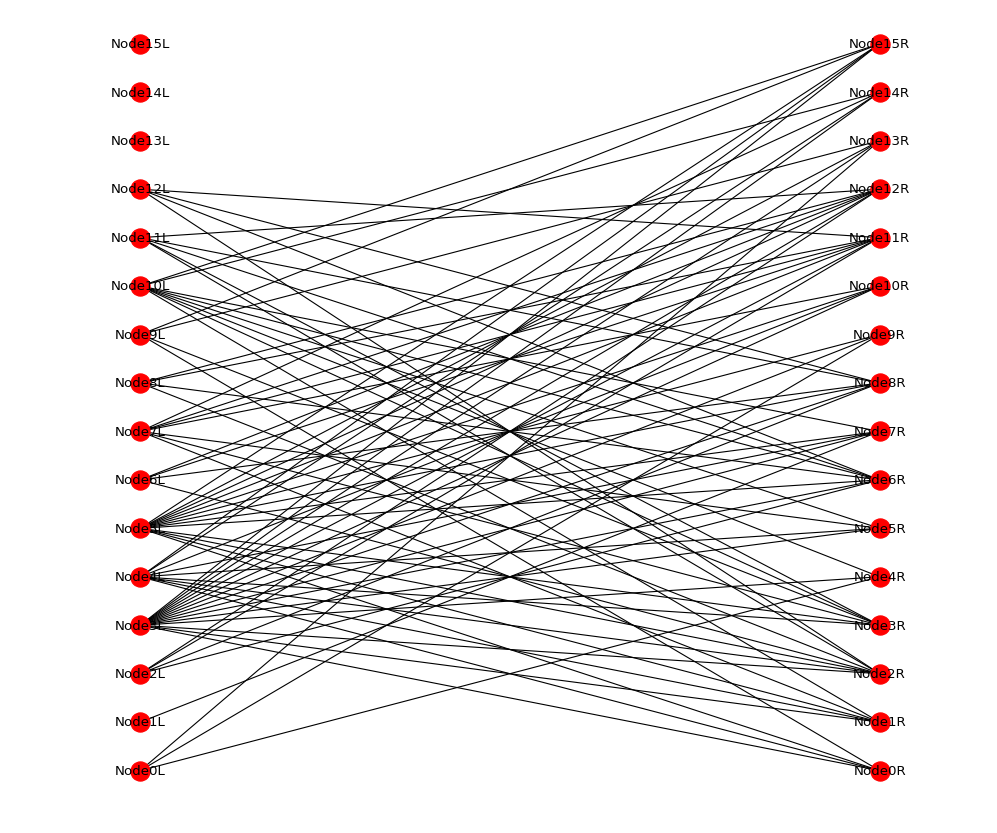

In [184]:
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pos = dict()
inc = 1

pos.update( (n, (1, i*2)) for i, n in enumerate(nodesL) ) # put nodes from X at x=1
pos.update( (n, (1.1, i*2)) for i, n in enumerate(nodesR) ) # put nodes from Y at x=2
edges = B.edges()

nx.draw(B, pos=pos, edges=edges, with_labels = True)
plt.show()

In [185]:
print(B.nodes(data=True))

[('Node0L', {'bipartite': 0}), ('Node1L', {'bipartite': 0}), ('Node2L', {'bipartite': 0}), ('Node3L', {'bipartite': 0}), ('Node4L', {'bipartite': 0}), ('Node5L', {'bipartite': 0}), ('Node6L', {'bipartite': 0}), ('Node7L', {'bipartite': 0}), ('Node8L', {'bipartite': 0}), ('Node9L', {'bipartite': 0}), ('Node10L', {'bipartite': 0}), ('Node11L', {'bipartite': 0}), ('Node12L', {'bipartite': 0}), ('Node13L', {'bipartite': 0}), ('Node14L', {'bipartite': 0}), ('Node15L', {'bipartite': 0}), ('Node0R', {'bipartite': 1}), ('Node1R', {'bipartite': 1}), ('Node2R', {'bipartite': 1}), ('Node3R', {'bipartite': 1}), ('Node4R', {'bipartite': 1}), ('Node5R', {'bipartite': 1}), ('Node6R', {'bipartite': 1}), ('Node7R', {'bipartite': 1}), ('Node8R', {'bipartite': 1}), ('Node9R', {'bipartite': 1}), ('Node10R', {'bipartite': 1}), ('Node11R', {'bipartite': 1}), ('Node12R', {'bipartite': 1}), ('Node13R', {'bipartite': 1}), ('Node14R', {'bipartite': 1}), ('Node15R', {'bipartite': 1})]


In [186]:
nx.is_connected(B)

False

In [187]:
Q3 = '''Sarah Stratman	Kelly Arbuckle	Tamara Gass	Vincent Gregorio	Sarah Kroenke	Alexandra Bastian	Hilary Caldwell	Alex Muessigmann	Bethany Neuhart	Ted Stocking	Stephanie Barker	Jake Kment	Alex Kreft	Rachel Mulder	Natalie Palmgren	Mary Quandt
	3	3	2		3	3	3	3		3	3	3		3	3
3		3	3	3	3	3	2	3	3	3	3	3	3	3	3
	3				3	2		2		3	2	2			
2	2	2	2	2	2	2	2	2	2	2	2	2	2	2	2
				2	2	3		3	3	2	3	3	3	2	
				2										2	
3	3	2	3	3	3	2	3	2	3	2	2	2	3	2	3
3	2	3	2	3	2	3		3	3	2	2	2	3	2	3
3	3		3	3	3		3		3	3			3	3	3
2	3	3	2	3	3	3	3	3	2	3	3	3	2	3	2
3		3	2	2	2		2	3	3		3	3	3	2	2
3	3	2		3	3	2	3	2	3	3	3	2	3	3	3
2	3		2	3	3		2		2	3			2	3	3
2	3	3	2	2,3	2	3	3	3	2	3	3	3		3	
3	3	3	2	2	2	3	3	3	3	2	3	3	3	2	3
2	2	3	2	2	2	3	2	2	2	2	2	2	2	2	2
'''

In [189]:
data3 = [y for y in [x for x in Q3.splitlines()] if y]
# for x in data:
#     print(x)
set3= []
for x in data3:
    x = x.split("\t")
    set3.append(x)
data3 = set3
nodes = data3[0]
for i in range(len(nodes)):    
    print(str(i)+" "+ str(nodes[i]))
    nodes[i] = "Node"+str(i)
print(nodes)
nodesR = nodes.copy()
nodesL = nodes.copy()

0 Sarah Stratman
1 Kelly Arbuckle
2 Tamara Gass
3 Vincent Gregorio
4 Sarah Kroenke
5 Alexandra Bastian
6 Hilary Caldwell
7 Alex Muessigmann
8 Bethany Neuhart
9 Ted Stocking
10 Stephanie Barker
11 Jake Kment
12 Alex Kreft
13 Rachel Mulder
14 Natalie Palmgren
15 Mary Quandt
['Node0', 'Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8', 'Node9', 'Node10', 'Node11', 'Node12', 'Node13', 'Node14', 'Node15']


In [190]:
from networkx.algorithms import bipartite
B2 = nx.Graph()
for i in range(len(nodes)):
    nodesL[i] = nodes[i]+"L"
for i in range(len(nodes)):
    nodesR[i] = nodes[i]+"R"
B2.add_nodes_from(nodesL, bipartite=0)
B2.add_nodes_from(nodesR, bipartite=1)

In [191]:
for x in range(len(data3)):
    for y in range(len(data3[x])):
        if x==y+1:
            continue
        if data3[x][y] == '2':
            B2.add_edges_from([(nodesL[x-1], nodesR[y])])

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


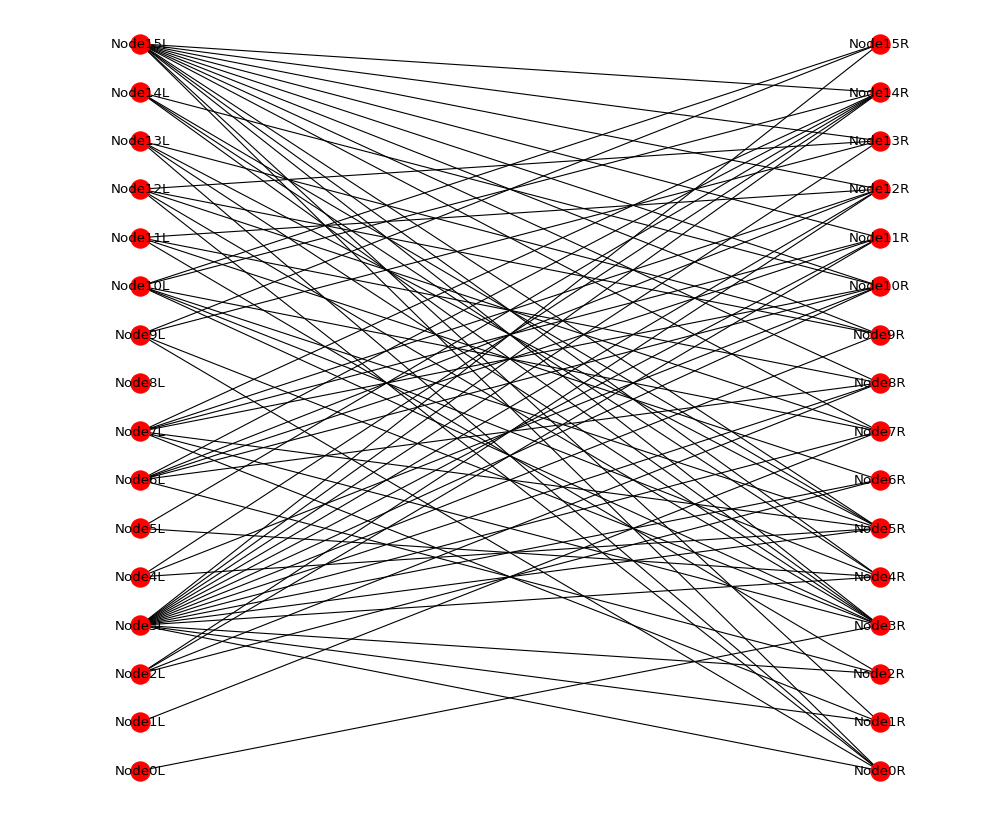

In [192]:
pos = dict()
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

pos.update( (n, (1, i*2)) for i, n in enumerate(nodesL) ) # put nodes from X at x=1
pos.update( (n, (1.1, i*2)) for i, n in enumerate(nodesR) ) # put nodes from Y at x=2
edges = B.edges()

nx.draw(B2, pos=pos, edges=edges, with_labels = True)
plt.show()